In [45]:
#========================================
# Bibliotecas Necessárias
# Data: 25/09/2022
# Autor: Átila Luna
#========================================

import numpy as np
from numpy import log as ln
import math
import matplotlib.pyplot as plt
import scipy.special as sc

In [46]:
#========================================
# Constantes do problema
# Data: 25/09/2022
# Autor: Átila Luna
#========================================

alphat = 1
p_i = 250.0
rw = 0,1
r1 = 10.0
r2 = 300.0

phi = [0.27, 0.27, 0.27]
k = [500, 1000, 500]
ct = [120e-06, 120e-06, 120e-06]
mu = [5, 5, 5]
eta = np.zeros(3)

for i in range(3):
    eta[i] = alphat*k[i]/(phi[i]*mu[i]*ct[i])


In [47]:
#========================================
# Funções úteis
# Data: 25/09/2022
# Autor: Átila Luna
#========================================
# Fatorial de um número
#========================================
def fac(n): 
    if (n==0 or n==1):
        return 1
    else:
        return n * fac(n-1)
#========================================
# Derivada Logarítmica
#========================================
def DerivLog(x1,y1,xc,yc,x2,y2): 
    d1=((y2-yc)/ln(x2/xc))*(ln(xc/x1)/ln(x2/x1))
    d2=((yc-y1)/ln(xc/x1))*(ln(x2/xc)/ln(x2/x1))
    return (d1+d2)

In [48]:
# =======================================
# Solução da Linha-Fonte
# Data: 25/09/2022
# Autor: Átila Luna
# =======================================
def FT_LINHAFONTE(u):
    #return sc.kn(0,1*math.sqrt(u))/u;
    return sc.kn(0,1*math.sqrt(u))/(u**(3/2)*sc.kn(1,math.sqrt(u)))

In [100]:
# =======================================
# Exemplo 2.14
# Data: 25/09/2022
# Autor: Átila Luna
# =======================================
def FT1_LINHAFONTE(u):
    M = [[sc.kv(0,100*math.sqrt(u)), sc.iv(0, 100*math.sqrt(u))],
         [sc.kv(1,math.sqrt(u)), (-1)*sc.iv(1, math.sqrt(u))]]
    b = [0, 1/(u**(3/2))]
    Minv = np.linalg.inv(M)
    [A, B] = np.dot(Minv,b)
    
    return A*sc.kn(0, 1*math.sqrt(u)) + B*sc.iv(0, 1*math.sqrt(u))

In [101]:
# ===============================================================================================
# Rotina para inversão numérica de uma função no espaço de Laplace pelo algoritimo de Stehfest
# Data: 25/09/2022
# Autor: Átila Luna
# ===============================================================================================

def CALCULA_PD(td):
    
    N = 12; # NP_STEHFEST

    v = np.zeros(65)
    for i in range(1, N+1):
        somat = 0
        inis = math.floor((i + 1)/2)
        fins = min(i,math.floor(N/2))
        a0=(-1)**(i+(N/2))

        for k in range(inis, fins+1):
            a1=k**(1+(N/2))
            a2a=2*k
            a2b=fac(a2a)
            a3a=((N/2)-k)
            a3b=fac(a3a)
            a4a=fac(k)
            a4b=a4a**2
            a5a=i-k
            a5b=fac(a5a)
            a6a=((2*k)-i)
            a6b=fac(a6a)
            somat=somat+(((a1*a2b)/(a3b*a4b*a5b*a6b)))
        v[i] = a0 * somat
    st = 0
    for m in range(1, N+1):
        u = m * ln(2.0) / td
    #=================================    
    # AQUI ENTRA A FUNÇÃO QUE EU QUERO    
    #================================
        st = st + v[m] * FT1_LINHAFONTE(u)
    return ln(2.0) * st / td

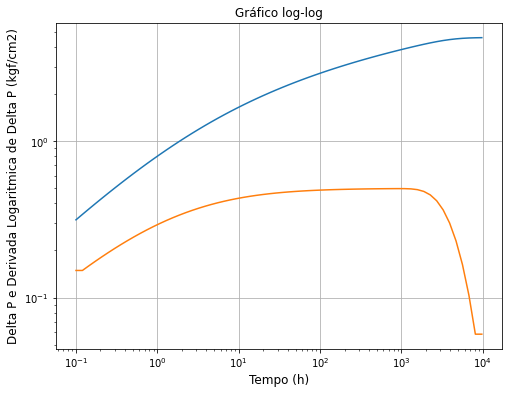

In [103]:
tDi = 0.1
tDf = 10000

n = 1

tD = np.zeros(65)
pD = np.zeros(65)
tD[0] = tDi

while tDi <= tDf:
    pD[n]=CALCULA_PD(tDi)
    tD[n]=tDi
    tDi=tDi*1.2
    n=n+1

PDLinha = np.zeros(65)
for n_p in range(2, n-1):
    PDLinha[n_p]=DerivLog(tD[n_p-1],pD[n_p-1],tD[n_p],pD[n_p],tD[n_p+1],pD[n_p+1])

PDLinha[1]=PDLinha[2]
PDLinha[0]=PDLinha[1]
PDLinha[n-1]=PDLinha[n-2]
pD[0] = pD[1]

fig = plt.figure(figsize=(8,6))
plt.plot(tD,pD)
plt.plot(tD,PDLinha)
plt.grid()
plt.title("Gráfico log-log")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tempo (h)", fontsize=12)
plt.ylabel("Delta P e Derivada Logaritmica de Delta P (kgf/cm2)", fontsize=12)
plt.show()